In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens
from matplotlib.pyplot import *

In [23]:
pobj = {}
qobj = {}
for ntype in ['base','goal']:
    pobj[ntype] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
    qobj[ntype] = tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)

In [28]:
al, n0, ml = {}, {}, {}
for ntype in ['base','goal']:
    for q in ['TT','TE','EE','EB']:
        al[ntype+q] = (np.loadtxt(qobj[ntype].f[q].al)).T[1]
        n0[ntype+q] = (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1]
        ml[ntype+q] = (np.loadtxt(qobj[ntype].f[q].ml[1])).T[1]

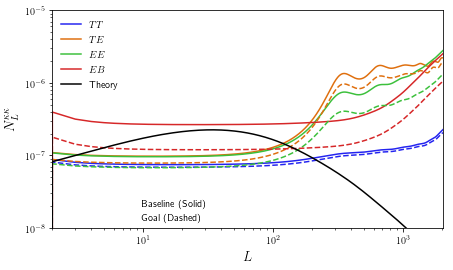

In [30]:
pl.plot_1dstyle(fsize=[7,4],ylab='$N_L^{\kappa\kappa}$',usetex=True,xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-8,ymax=1e-5)
co = rcParams['axes.prop_cycle'].by_key()['color']
l = qobj['base'].l
for ntype in ['base','goal']:
    for i, q in enumerate(['TT','TE','EE','EB']):
        if ntype == 'base': plot(l,al[ntype+q],color=co[i],ls='-',label=r'$'+q+'$')
        if ntype == 'goal': plot(l,al[ntype+q],color=co[i],ls='--')
figtext(0.3,0.20,'Baseline (Solid)')
figtext(0.3,0.15,'Goal (Dashed)')
plot(pobj['base'].l,pobj['base'].kk,'k',label='Theory')
legend()
savefig('fig_lens_noise.pdf')